<a href="https://colab.research.google.com/github/Qasim-Chaudhry/Qasim-Chaudhry/blob/main/TimeSeries_Analysis_of_Ethereum_(ETH_USDT)_Mar_ket_Projections_using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Collection & Preparation**

In [ ]:
import yfinance as yf
import pandas as pd

# Download Ethereum historical data
eth_data = yf.download('ETH-USD', start='2020-01-01', end='2025-5-1')  # adjust date as needed
eth_data.to_csv('eth_data.csv')  # optional, save to CSV
eth_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,
2020-01-01,130.802002,132.835358,129.198288,129.630661,7935230330
2020-01-02,127.410179,130.820038,126.954910,130.820038,8032709256
2020-01-03,134.171707,134.554016,126.490021,127.411263,10476845358
2020-01-04,135.069366,136.052719,133.040558,134.168518,7430904515
2020-01-05,136.276779,139.410202,135.045624,135.072098,7526675353


In [ ]:
eth_data.tail(10)

Price,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,
2025-04-21,1579.734497,1656.119629,1566.147461,1587.460938,15403785611
2025-04-22,1757.331665,1773.639160,1542.000366,1579.815186,23747917555
2025-04-23,1796.104248,1829.709961,1746.924072,1757.196533,22904644756
2025-04-24,1769.831665,1801.691406,1724.740723,1795.979492,15207402759
2025-04-25,1786.634521,1826.696045,1740.331909,1770.003662,17459399281
2025-04-26,1821.881104,1839.363037,1781.473877,1786.532959,11926379867
2025-04-27,1792.864990,1856.443848,1785.902100,1822.175537,11321944113
2025-04-28,1798.851807,1827.482300,1747.726807,1792.446167,17043640437


**Preprocessing**

In [ ]:
eth_data = eth_data[['Open', 'High', 'Low', 'Close', 'Volume']]
eth_data = eth_data.dropna()  # drop missing rows
eth_data.index = pd.to_datetime(eth_data.index)  # ensure datetime index
eth_data = eth_data.asfreq('D')  # daily frequency


**Step 2**

**Exploratory Data Analysis**

Goal: Understand trends, volatility, seasonality

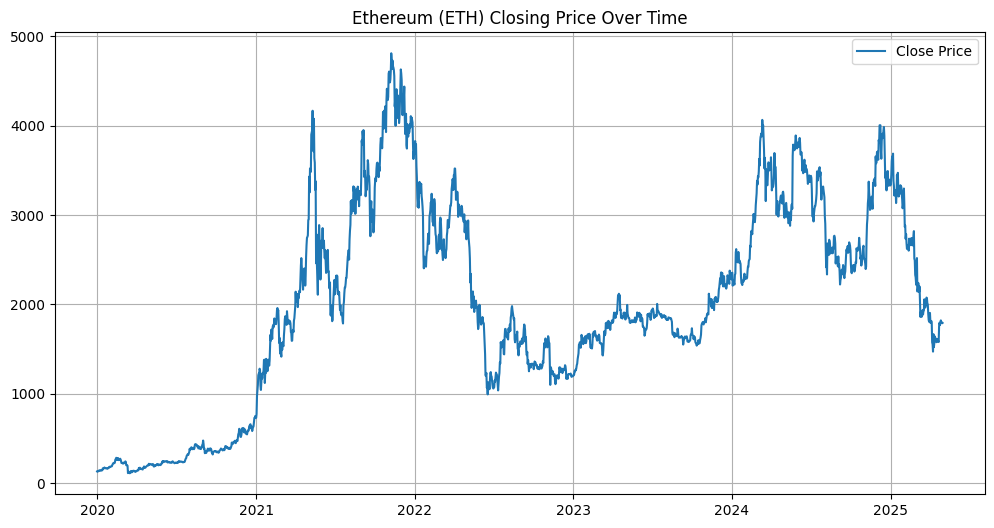

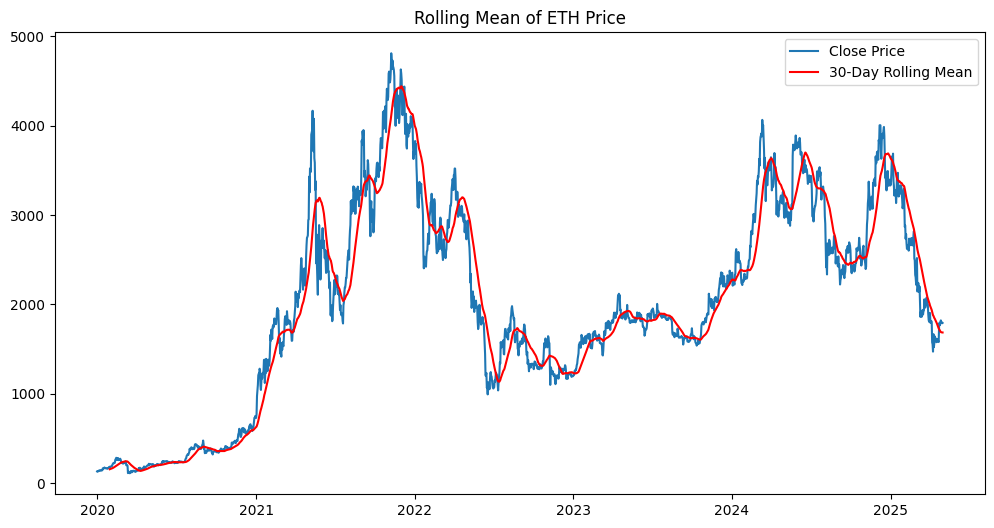

In [ ]:
import matplotlib.pyplot as plt

# Line plot of closing price
plt.figure(figsize=(12, 6))
plt.plot(eth_data['Close'], label='Close Price')
plt.title('Ethereum (ETH) Closing Price Over Time')
plt.legend()
plt.grid()
plt.show()

# Rolling average (30 days)
eth_data['Rolling_Mean'] = eth_data['Close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(eth_data['Close'], label='Close Price')
plt.plot(eth_data['Rolling_Mean'], label='30-Day Rolling Mean', color='red')
plt.legend()
plt.title('Rolling Mean of ETH Price')
plt.show()


In [ ]:
eth_data.describe()


Price,Open,High,Low,Close,Volume,Rolling_Mean
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,
count,1947.000000,1947.000000,1947.000000,1947.000000,1.947000e+03,1918.000000
mean,2008.963560,2062.790756,1949.521298,2009.630708,1.700910e+10,2026.060673
std,1129.411226,1159.736336,1094.321159,1128.279039,1.070564e+10,1105.954641
min,110.406784,116.021622,95.184303,110.605873,2.081626e+09,136.959600
25%,1294.421326,1332.943909,1261.469299,1294.604858,9.724072e+09,1354.932705
50%,1889.073730,1926.421753,1852.790894,1889.322388,1.487800e+10,1894.793872
75%,2906.467041,2971.952759,2795.339966,2906.588501,2.105247e+10,2918.828668
max,4810.071289,4891.704590,4718.039062,4812.087402,9.245355e+10,4442.874154


 **Step 3: Stationarity Testing (ADF Test)**

Goal: Check if the series is stationary (no trend/seasonality)

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(eth_data['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -2.218535297384039
p-value: 0.19958711977862553


**p-value < 0.05, series is stationary**

In [ ]:
# series is not stationary
eth_data['Close_diff'] = eth_data['Close'].diff()


**Step 4: ARIMA Model Development**

Goal: Select (p, d, q) and train ARIMA

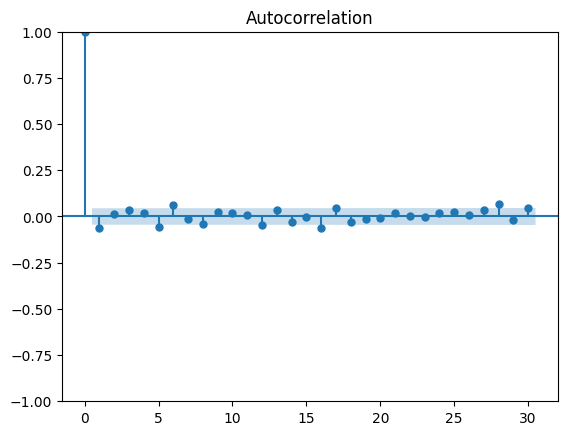

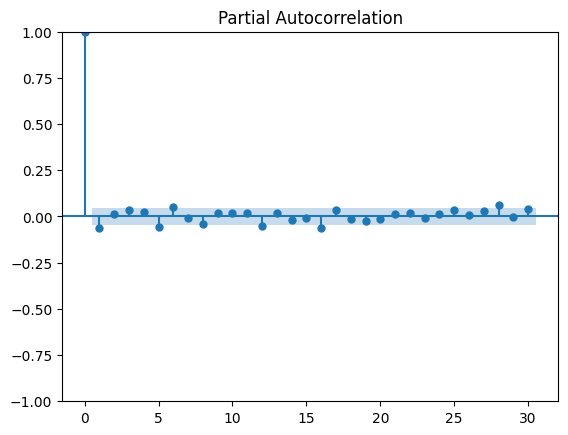

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(eth_data['Close_diff'].dropna(), lags=30)
plot_pacf(eth_data['Close_diff'].dropna(), lags=30)
plt.show()


In [ ]:
# Train ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(eth_data['Close'], order=(1,1,1))  # Example (p,d,q)
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                ETH-USD   No. Observations:                 1947
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11590.185
Date:                Sun, 18 May 2025   AIC                          23186.371
Time:                        07:11:34   BIC                          23203.091
Sample:                    01-01-2020   HQIC                         23192.519
                         - 04-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1393      0.211     -0.661      0.509      -0.552       0.274
ma.L1          0.0762      0.213      0.358      0.721      -0.341       0.494
sigma2      8743.1016    124.064     70.473      0.0

**Step 5: Model Evaluation**

Goal: Measure accuracy with RMSE and MAPE

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Predict in-sample
eth_data['forecast'] = model_fit.predict(start=1, end=len(eth_data), typ='levels')

rmse = np.sqrt(mean_squared_error(eth_data['Close'][1:], eth_data['forecast'][1:]))
mape = mean_absolute_percentage_error(eth_data['Close'][1:], eth_data['forecast'][1:])

print('RMSE:', rmse)
print('MAPE:', mape)


RMSE: 93.40653656553876
MAPE: 0.029568449918483054


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: title={'center': 'Residuals'}, xlabel='Date'>

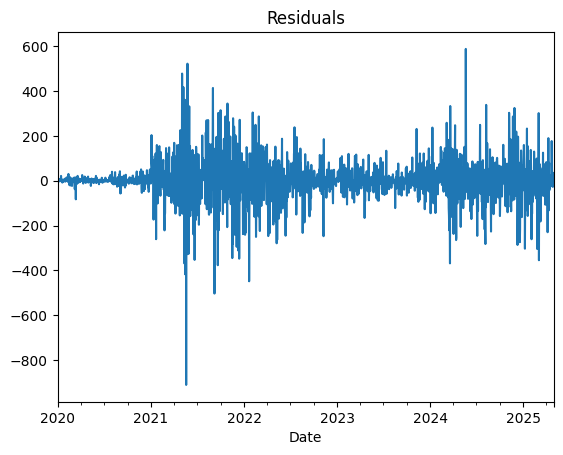

In [ ]:
# Residuals
residuals = model_fit.resid
residuals.plot(title="Residuals")


 **Step 6: Forecasting & Visualization**

Goal: Predict next 30 days & visualize

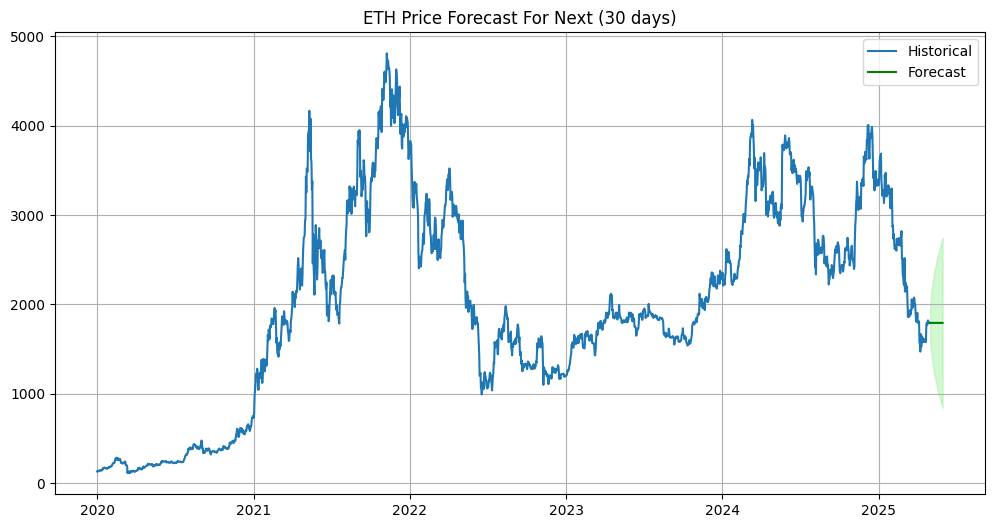

In [ ]:
# Forecast
forecast = model_fit.get_forecast(steps=30)
forecast_df = forecast.summary_frame()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(eth_data['Close'], label='Historical')
plt.plot(forecast_df['mean'], label='Forecast', color='green')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='lightgreen', alpha=0.4)
plt.title('ETH Price Forecast For Next (30 days)')
plt.legend()
plt.grid()
plt.show()